In [1]:
import json
import functions as fct
from IPython.display import display, HTML
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def normalize_word(word):
    return word.strip(string.punctuation)

CLEANP = re.compile('<.*?>') 

def clean_html_tag(html):
  clean_text = re.sub(CLEANP, '', html)
  return clean_text

In [3]:
train_path = 'SCOTUS/train.json'
html_facts = "target_analysis/facts_missing_words.html"
html_summaries = "target_analysis/summaries_missing_words.html"

with open(train_path, 'r', encoding="utf-8") as f:
    train = json.load(f)
        
count_missing_words_facts = []
count_word_facts = []
count_missing_words_summaries = []
count_word_summaries = []

for i in range(0, 2670):
    source = fct.open_file(f"data_txt_save/text/train_{i}.txt", 'txt')
    facts = train[i]["raw_target"]["facts_of_the_case"]
    summaries = fct.open_file(f"data_txt_save/summary/train_{i}.txt", 'txt')
    
    words_source = {normalize_word(word) for word in source.split()}
    words_facts = facts.split()
    words_summaries = summaries.split()

    highlighted_facts_words = [
        f'<span style="background-color: yellow; color: black;">{word}</span>' if normalize_word(word) not in words_source else word 
        for word in words_facts
    ]
    
    highlighted_summaries_words = [
        f'<span style="background-color: yellow; color: black;">{word}</span>' if normalize_word(word) not in words_source else word 
        for word in words_summaries
    ]
    
    highlighted_facts_count = sum(1 for word in words_facts if normalize_word(word) not in words_source)  
    count_missing_words_facts.append(highlighted_facts_count)
    count_word_facts.append(len(words_facts))
    
    highlighted_summaries_count = sum(1 for word in words_summaries if normalize_word(word) not in words_source)  
    count_missing_words_summaries.append(highlighted_summaries_count)
    count_word_summaries.append(len(words_summaries))

    highlighted_facts_source = ' '.join(highlighted_facts_words)
    highlighted_summaries_source = ' '.join(highlighted_summaries_words)


    with open(html_facts, 'a', encoding='utf-8') as f:
        f.write(f'{i} : {highlighted_facts_count}/{len(words_facts)} words not found\n')
        f.write(f"<p>{highlighted_facts_source}</p>\n")
        
    with open(html_summaries, 'a', encoding='utf-8') as f:
        f.write(f'{i} : {highlighted_summaries_count}/{len(words_summaries)} words not found\n')
        f.write(f"<p>{highlighted_summaries_source}</p>\n")

In [4]:
df = pd.DataFrame({
    'Facts missing words': count_missing_words_facts,
    'Facts words': count_word_facts,
    'Summaries missing words': count_missing_words_summaries,
    'Summaries words': count_word_summaries
})

In [5]:
avg_facts_missing_words = df['Facts missing words'].mean()
avg_word_facts = df['Facts words'].mean()
avg_facts_proportion_missing = (df['Facts missing words']/df['Facts words']).mean()

print(f"Average Missing words in facts: {avg_facts_missing_words}")
print(f"Average Words in facts: {avg_word_facts}")

print(f"Average proportion Missing words in facts: {avg_facts_proportion_missing}")


Average Missing words in facts: 24.189138576779026
Average Words in facts: 166.5056179775281
Average proportion Missing words in facts: 0.1400043641494746


In [6]:
avg_summaries_missing_words = df['Summaries missing words'].mean()
avg_word_summaries = df['Summaries words'].mean()
avg_summaries_proportion_missing = (df['Summaries missing words']/df['Summaries words']).mean()

print(f"Average Missing words in target: {avg_summaries_missing_words}")
print(f"Average Words in target: {avg_word_summaries}")

print(f"Average proportion Missing words in target: {avg_summaries_proportion_missing}")

Average Missing words in target: 48.15093632958801
Average Words in target: 353.7247191011236
Average proportion Missing words in target: 0.13217630894148993


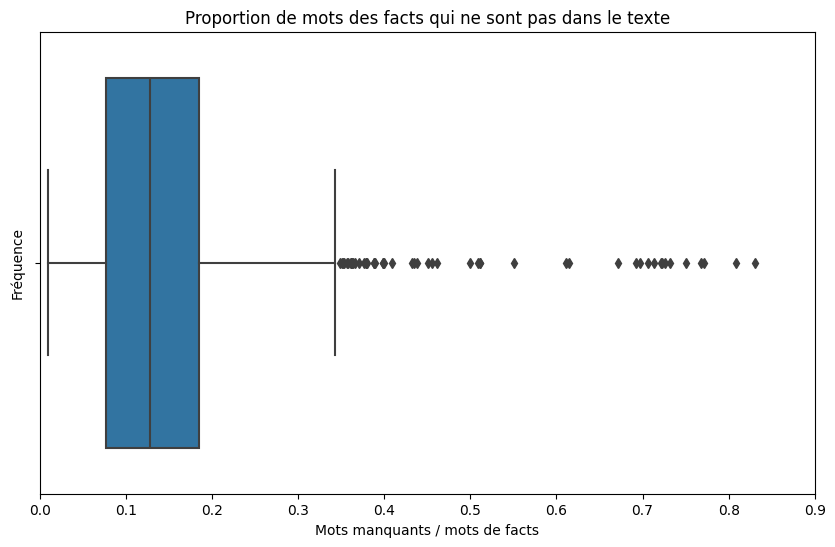

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Facts missing words']/df['Facts words'])

plt.title('Proportion de mots des facts qui ne sont pas dans le texte')
plt.xlabel('Mots manquants / mots de facts')
plt.ylabel('Fréquence')
plt.xlim(0, 0.9)
plt.xticks(np.arange(0, 0.91, 0.1))
plt.show()

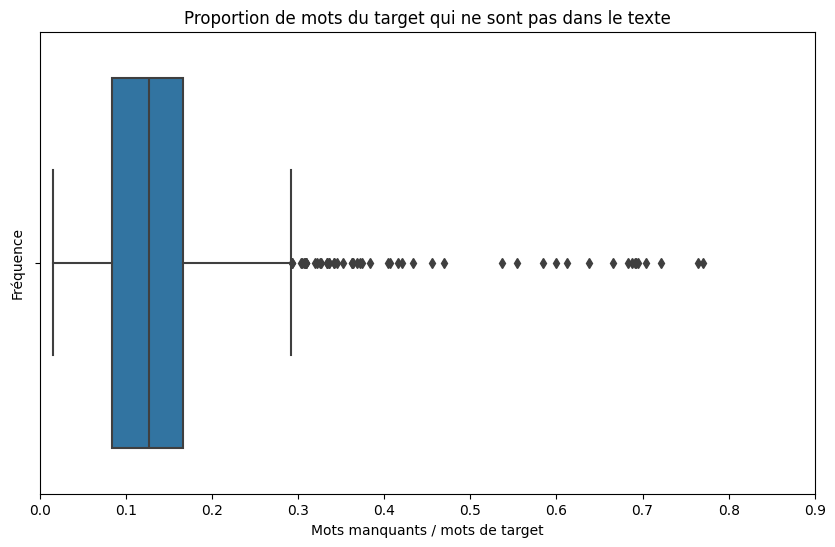

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Summaries missing words']/df['Summaries words'])

plt.title('Proportion de mots du target qui ne sont pas dans le texte')
plt.xlabel('Mots manquants / mots de target')
plt.ylabel('Fréquence')
plt.xlim(0, 0.9)
plt.xticks(np.arange(0, 0.91, 0.1))
plt.show()

In [9]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, float('inf')]

for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]
    
    if upper_bound == float('inf'):
        # Pour le dernier intervalle (> 0.8)
        count = (df['Facts missing words'] / df['Facts words'] > lower_bound).sum()
        print(f"Nombre de facts où le ratio est > {lower_bound}: {count}")
    else:
        # Pour les intervalles standards
        count = ((df['Facts missing words'] / df['Facts words'] >= lower_bound) & 
                 (df['Facts missing words'] / df['Facts words'] < upper_bound)).sum()
        print(f"Nombre de facts où {lower_bound} ≤ ratio < {upper_bound}: {count}")
        
print()

for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]
    
    if upper_bound == float('inf'):
        # Pour le dernier intervalle (> 0.8)
        count = (df['Summaries missing words'] / df['Summaries words'] > lower_bound).sum()
        print(f"Nombre de target où le ratio est > {lower_bound}: {count}")
    else:
        # Pour les intervalles standards
        count = ((df['Summaries missing words'] / df['Summaries words'] >= lower_bound) & 
                 (df['Summaries missing words'] / df['Summaries words'] < upper_bound)).sum()
        print(f"Nombre de target où {lower_bound} ≤ ratio < {upper_bound}: {count}")


Nombre de facts où 0 ≤ ratio < 0.1: 957
Nombre de facts où 0.1 ≤ ratio < 0.2: 1182
Nombre de facts où 0.2 ≤ ratio < 0.3: 442
Nombre de facts où 0.3 ≤ ratio < 0.4: 60
Nombre de facts où 0.4 ≤ ratio < 0.5: 8
Nombre de facts où 0.5 ≤ ratio < 0.6: 5
Nombre de facts où 0.6 ≤ ratio < 0.7: 5
Nombre de facts où 0.7 ≤ ratio < 0.8: 9
Nombre de facts où le ratio est > 0.8: 2

Nombre de target où 0 ≤ ratio < 0.1: 905
Nombre de target où 0.1 ≤ ratio < 0.2: 1451
Nombre de target où 0.2 ≤ ratio < 0.3: 265
Nombre de target où 0.3 ≤ ratio < 0.4: 26
Nombre de target où 0.4 ≤ ratio < 0.5: 7
Nombre de target où 0.5 ≤ ratio < 0.6: 3
Nombre de target où 0.6 ≤ ratio < 0.7: 9
Nombre de target où 0.7 ≤ ratio < 0.8: 4
Nombre de target où le ratio est > 0.8: 0


In [ ]:
with open(html_facts, 'r', encoding="utf-8") as f:
    hf = f.read()
    
display(HTML(hf))